<a href="https://colab.research.google.com/github/kenanmorani/pattern_recognition_idu/blob/main/PCA%26LDA_pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The code builds two classes PCA and LDA classes aiming at demontionality reduction. 
* The code applies the two mdethods on the popular 'iris' dataset.


In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Loading 'iris' dataset

In [ ]:
#data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Bulding PCA class

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

# Applying PCA to 'iris' dataset

In [ ]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [ ]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


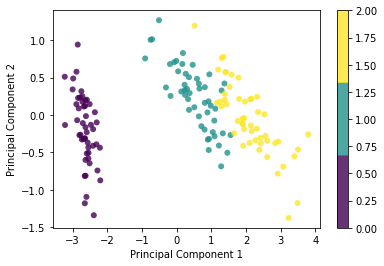

In [ ]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Building LDA class

In [ ]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

# Applying LDA to 'iris' Dataset

In [ ]:
# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


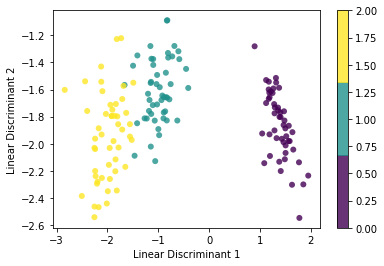

In [ ]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()